# Reminders on scikit-learn and machine learning (correction)

Inspired by Xavier Dupré's course

A few simple exercises on *scikit-learn*. The notebook is long for those who are new to machine learning and probably without suspense for those who have already done some.

In [1]:
%matplotlib inline

## Synthetic dataset

We simulate a set of random data, with a uniform distribution $\mathcal{U}_{(0,1)}$.

In [2]:
from numpy import random
n = 1000
X = random.rand(n, 2)
X[:5]

array([[0.02037951, 0.30968762],
       [0.29413   , 0.37153774],
       [0.41002219, 0.33296235],
       [0.86395508, 0.87805471],
       [0.94593263, 0.3296339 ]])

Let's create a starting model: $Y = 3 X_1 - 2 X_2^2 + \epsilon$.

We'll need to approximate $Y$ using the descriptors $X_1$ and $X_2$. 

$\epsilon $~$ \mathcal{U}_{(0,1)}$ is a source of noise that we can't control for prediction.

In [3]:
y = X[:, 0] * 3 - 2 * X[:, 1] ** 2 + random.rand(n)
y[:5]

array([-2.99442799e-03,  1.27015060e+00,  1.85177846e+00,  1.78228679e+00,
        3.38708163e+00])

## Exercise 1: dividing into training and test databases

We need to test our model on a different database from the one used for training **in order to measure its power of generalization**. As we have seen, the empirical risk on a given set of data is not characteristic of the general risk, and we may witness a phenomenon of over-learning on the training set.

In our case, we want the model to learn the law $3 X_1 - 2 X_2^2$ and **overlearning would be equivalent to memorizing the noise vector $\epsilon$** which only corresponds to variations in $Y$ that are independent of our model.

Simple [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Exercice 2: learn a linear regression

Find the weights $\theta = \begin{pmatrix}
           \theta_{1} \\
           \theta_{2}
         \end{pmatrix}$ solution de $\underset{\theta}{\arg\max} \sum_{i=1}^{n}|Y_i-f_{\theta}(\mathbf{X}_i)|^2$
         
Where $f_{\theta}(\mathbf{X}) = \theta_0 + \sum_{d=1}^{D}\theta_d X_d$ with in our case $D=2$

Calculate the coefficient $R^2$. 
$$R^2=1-\frac{\sum_{i=1}^{n}|Y_i-f(\mathbf{X}_i)|^2}{\sum_{i=1}^{n}|Y_i-\overline{Y}|^2}$$

Where $\mathbf{X} = \begin{pmatrix}
           X_{1} \\
           X_{2}
         \end{pmatrix}$ et $\overline{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_i$

Use : [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_test[:5]

array([ 3.03276568,  1.93488705,  1.0659546 ,  0.05197722, -0.12721171])

In [13]:
reg.predict(X_test)[:5]

array([ 2.91609206,  2.21574498,  1.32051075, -0.11248917, -0.2150556 ])

In [6]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg.predict(X_test))
score

0.9045547829832322

## Exercise 3: improve the model by applying a well-chosen transformation

The starting model is: $Y = 3 X_1 - 2 X_2^2 + \epsilon$. Simply add polynomial features with [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Taking the parameter :
```python
degree=2
```
The intial descriptor set being $\mathbf{X} = \begin{pmatrix} X_{1} \\ X_{2} \end{pmatrix}$ 
will now become $\mathbf{X} = \begin{pmatrix} 1 \\ X_{1} \\ X_{2} \\ X_{1}^2 \\ X_{1}X_{2} \\ X_{2}^2 \end{pmatrix}$ which gives : 

$$f_{\theta}(\mathbf{X}) = \theta'_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_1^2 + \theta_4 X_1X_2 + \theta_5 X_2^2$$

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(X_train)
X_train2 = poly.transform(X_train)
reg2 = LinearRegression()
reg2.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
X_train[:5]

array([[0.42992684, 0.47016224],
       [0.50833676, 0.23546406],
       [0.92596164, 0.60349523],
       [0.30745336, 0.21012411],
       [0.293848  , 0.88110896]])

In [9]:
X_train2[:5]

array([[1.        , 0.42992684, 0.47016224, 0.18483708, 0.20213536,
        0.22105253],
       [1.        , 0.50833676, 0.23546406, 0.25840626, 0.11969504,
        0.05544332],
       [1.        , 0.92596164, 0.60349523, 0.85740496, 0.55881343,
        0.36420649],
       [1.        , 0.30745336, 0.21012411, 0.09452757, 0.06460336,
        0.04415214],
       [1.        , 0.293848  , 0.88110896, 0.08634665, 0.25891211,
        0.776353  ]])

In [9]:
score2 = r2_score(y_test, reg2.predict(poly.transform(X_test)))
score2

0.9339226002563631

The $R^2$ coefficient is higher because we use the same variables as the model. Theoretically, it is not possible to go beyond this.

## Exercise 4: learn a random forest

Use: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
r2_score(y_test, rf.predict(X_test))

0.9074907193786829

The linear model is the best model in our case, since the data have been constructed in this way. It is expected that the $R^2$ is not higher, or at least not significantly higher. Let's have a look at the polynomial features...

In [12]:
rf2 = RandomForestRegressor()
rf2.fit(X_train2, y_train)
r2_score(y_test, rf2.predict(poly.transform(X_test)))

0.9094825956718496

Before jumping to conclusions, you'd have to repeat the experiment several times before saying that performance is better or worse with these features, which this notebook won't do, since the theoretical response is known in this case.

## Exercise 5: A bit of math

Compare the two models on the following data? What do you notice? Why or why not?

In [13]:
X_test2 = random.rand(n, 2) + 0.5
y_test2 = X_test2[:, 0] * 3 - 2 * X_test2[:, 1] ** 2 + random.rand(n)

In [14]:
res = []
for model in [reg, reg2, rf, rf2]:
    name = model.__class__.__name__
    try:
        pred = model.predict(X_test)
        pred2 = model.predict(X_test2)
    except Exception:
        pred = model.predict(poly.transform(X_test))
        pred2 = model.predict(poly.transform(X_test2))
        name += " + X^2"
    res.append(dict(name=name, r2=r2_score(y_test, pred),
                    r2_jeu2=r2_score(y_test2, pred2)))

import pandas as pd
df = pd.DataFrame(res)
df

name        r2   r2_jeu2
0             LinearRegression  0.911072  0.673700
1       LinearRegression + X^2  0.933923  0.954966
2        RandomForestRegressor  0.907491  0.525861
3  RandomForestRegressor + X^2  0.909483  0.509463

The only model that really works is linear regression with polynomial features. As it is equivalent to the theoretical model, it's normal that it doesn't crash too much, even if its coefficients aren't identical to the theoretical model (more data would be needed for it to converge).

In [15]:
reg2.coef_, reg2.intercept_

(array([ 0.        ,  2.80696757,  0.2578189 ,  0.21422309,  0.02403817,
        -2.28937486]), 0.502051217734563)

For the other models, let's have a look at what's going on.

## Exercise 6: making a graph with...

I'll let the code describe the approach chosen to illustrate the shortcomings of the previous models. For the lazy, the commentary follows the graph.

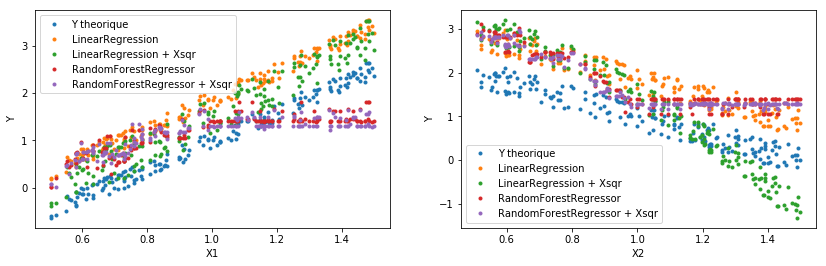

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

a, b = 0.9, 1.1
index1 = (X_test2[:, 0] >= a) & (X_test2[:, 0] <= b)
index2 = (X_test2[:, 1] >= a) & (X_test2[:, 1] <= b)
yth = X_test2[:, 0] * 3 - 2 * X_test2[:, 1]


ax[0].set_xlabel("X1")
ax[0].set_ylabel("Y")
ax[0].plot(X_test2[index2, 0], yth[index2], '.', label='Y theorique')
ax[1].set_xlabel("X2")
ax[1].set_ylabel("Y")
ax[1].plot(X_test2[index1, 1], yth[index1], '.', label='Y theorique')

for model in [reg, reg2, rf, rf2]:
    name = model.__class__.__name__
    try:
        pred2 = model.predict(X_test2)
    except Exception:
        pred2 = model.predict(poly.transform(X_test2))
        name += " + Xsqr"
    ax[0].plot(X_test2[index2, 0], pred2[index2], '.', label=name)
    ax[1].plot(X_test2[index1, 1], pred2[index1], '.', label=name)
ax[0].legend()
ax[1].legend();

The graph studies the model variables according to one coordinate, while restricting the other to a given interval. We can immediately see that the random forest becomes constant beyond a certain threshold. Once again, this is quite normal, since the learning base only contains $X_1, X_2$ in the interval $[0, 1]$. Apart from that, each decision tree produces a constant value, simply because they are staircase functions: a random forest is an average of staircase functions, and is therefore bounded. As for the first linear regression, it cannot capture second-degree effects; it is linear with respect to the initial variables. It deviates less, but still deviates from the variable to be predicted.

The aim of this exercise is to illustrate that a machine learning model is estimated on a dataset that follows a certain distribution. When the data on which the model is used to predict no longer follows this distribution, the models return answers that are likely to be wrong, in different ways depending on the model.

This is why we say that machine learning models need to be relearned regularly, especially if they are applied to data generated by human activity and not data derived from physical problems.

## Exercise 7: Illustrating overfitting with a decision tree

As the complexity of the model increases, overfitting again occurs. Similarly, the model using only $X_1$ and $X_2$ is not necessarily adapted to the problem and is in a case of underlearning. 

<img src="images/ex_over-underfitting.png"> 

On the first data set.

In [18]:
from sklearn.tree import DecisionTreeRegressor

res = []
for md in range(1, 20):
    tree = DecisionTreeRegressor(max_depth=md)
    tree.fit(X_train, y_train)
    r2_train = r2_score(y_train, tree.predict(X_train))
    r2_test = r2_score(y_test, tree.predict(X_test))
    res.append(dict(profondeur=md, r2_train=r2_train, r2_test=r2_test))

df = pd.DataFrame(res)
df.head()

profondeur   r2_test  r2_train
0           1  0.483875  0.519442
1           2  0.719082  0.755440
2           3  0.830321  0.854605
3           4  0.867682  0.904775
4           5  0.897708  0.935766

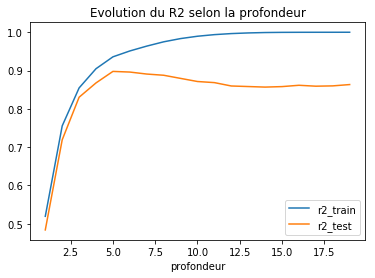

In [19]:
ax = df.plot(x='profondeur', y=['r2_train', 'r2_test'])
ax.set_title("Evolution du R2 selon la profondeur");

## Exercise 8: Increasing the number of features and regularizing a logistic regression

The aim is to examine the impact of regularizing the coefficients of a logistic regression as the number of features increases. We use polynomial features and a logistic regression. [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) or [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

In [20]:
from sklearn.linear_model import Ridge, Lasso
import numpy.linalg as nplin
import numpy

def coef_non_nuls(coef):
    return sum(numpy.abs(coef) > 0.001)

res = []
for d in range(1, 21):
    poly = PolynomialFeatures(degree=d)    
    poly.fit(X_train)
    X_test2 = poly.transform(X_test)
    
    reg = LinearRegression()
    reg.fit(poly.transform(X_train), y_train)
    r2_reg = r2_score(y_test, reg.predict(X_test2))
    
    rid = Ridge(alpha=10)
    rid.fit(poly.transform(X_train), y_train)
    r2_rid = r2_score(y_test, rid.predict(X_test2))
    
    las = Lasso(alpha=0.01)
    las.fit(poly.transform(X_train), y_train)
    r2_las = r2_score(y_test, las.predict(X_test2))
    
    res.append(dict(degre=d, nb_features=X_test2.shape[1],
                    r2_reg=r2_reg, r2_las=r2_las, r2_rid=r2_rid,
                    norm_reg=nplin.norm(reg.coef_),
                    norm_rid=nplin.norm(rid.coef_),
                    norm_las=nplin.norm(las.coef_),
                    nnul_reg=coef_non_nuls(reg.coef_),
                    nnul_rid=coef_non_nuls(rid.coef_),
                    nnul_las=coef_non_nuls(las.coef_),
                    ))

df = pandas.DataFrame(res)
df

degre  nb_features  nnul_las  nnul_reg  nnul_rid  norm_las      norm_reg  \
0       1            3         2         2         2  3.531466  3.683545e+00   
1       2            6         3         5         5  3.309395  3.637753e+00   
2       3           10         4         9         9  3.225073  4.386374e+00   
3       4           15         4        14        14  3.225070  5.715833e+00   
4       5           21         4        20        20  3.225113  5.946290e+01   
5       6           28         4        28        27  3.225123  4.200109e+13   
6       7           36         4        36        35  3.225125  4.024209e+13   
7       8           45         4        45        42  3.225125  2.783454e+13   
8       9           55         4        55        53  3.225125  2.409189e+13   
9      10           66         4        65        65  3.225125  3.653677e+05   
10     11           78         4        77        76  3.225125  1.889858e+06   
11     12           91         4        91        90  3.225125  1.631905e+07   
12     13          105         4       105       104  3.225125  3.189573e+13   
13     14          120         4       120       118  3.225125  4.712353e+08   
14     15          136         4       136       134  3.225125  4.868558e+09   
15     16          153         4       153       149  3.225125  2.837280e+13   
16     17          171         4       171       165  3.225125  4.003140e+13   
17     18          190         4       190       181  3.225125  1.249026e+12   
18     19          210         4       210       201  3.225125  3.241746e+13   
19     20          231         4       231       221  3.225125  8.414582e+13   

    norm_rid    r2_las     r2_reg    r2_rid  
0   3.209087  0.910365   0.911072  0.897988  
1   2.427482  0.931542   0.933923  0.914226  
2   2.108928  0.931607   0.933371  0.912179  
3   2.001710  0.931607   0.933856  0.911037  
4   1.971300  0.931607   0.934050  0.911022  
5   1.962195  0.931607   0.914919  0.911261  
6   1.957227  0.931607   0.856444  0.911431  
7   1.952260  0.931607   0.875452  0.911482  
8   1.946912  0.931607   0.889257  0.911445  
9   1.941623  0.931607   0.928012  0.911362  
10  1.936807  0.931607   0.928314  0.911265  
11  1.932684  0.931607   0.927176  0.911174  
12  1.929297  0.931607   0.816687  0.911096  
13  1.926586  0.931607   0.911363  0.911033  
14  1.924445  0.931607   0.914214  0.910983  
15  1.922758  0.931607   0.780264  0.910944  
16  1.921418  0.931607   0.573790  0.910912  
17  1.920337  0.931607   0.833254  0.910885  
18  1.919446  0.931607  -0.786594  0.910861  
19  1.918694  0.931607 -18.417670  0.910839

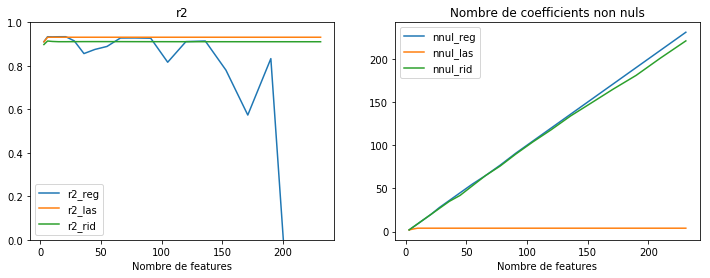

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df.plot(x="nb_features", y=["r2_reg", "r2_las", "r2_rid"], ax=ax[0])
ax[0].set_xlabel("Nombre de features")
ax[0].set_ylim([0, 1])
ax[0].set_title("r2")
df.plot(x="nb_features", y=["nnul_reg", "nnul_las", "nnul_rid"], ax=ax[1])
ax[1].set_xlabel("Nombre de features")
ax[1].set_title("Nombre de coefficients non nuls");

Numerically, the linear regression becomes difficult to estimate as the number of features increases. Theoretically, there should be no drop in performance, but the graph shows obvious errors. The result is an exploding norm of coefficients. Regularization succeeds in constraining the models. Ridge* regression will produce many small non-zero coefficients, while Lasso* regression will concentrate the norm on just a few coefficients. This observation is only true in the case of linear regression with quadratic error.